In [20]:
import numpy as np
import scipy.io
from scipy.stats import f_oneway,shapiro

In [10]:
# Load MATLAB data
data = scipy.io.loadmat('Data_example3.mat')
strength = data['strength']
alloy = data['alloy']

In [11]:
# Test di normalità
_, p = shapiro(data['strength'])
p

0.37546423077583313

In [12]:
# Divido i due gruppi

st = data['strength'][data['alloy'] == 'st']
al1 = data['strength'][data['alloy'] == 'al1']
al2 = data['strength'][data['alloy'] == 'al1']

mean_st = np.nanmean(st)
mean_al1 = np.nanmean(al1)
mean_al2 = np.nanmean(al2)
dev_st = np.nanstd(st)
dev_al1 = np.nanstd(al1)
dev_al2 = np.nanstd(al2)

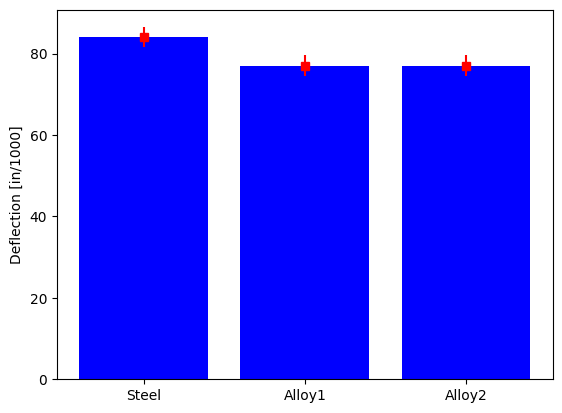

In [13]:
## Visualizzazione dei dati
plt.figure()
plt.bar([1, 2,3], [mean_st, mean_al1, mean_al2], color='blue')
plt.errorbar([1, 2,3], [mean_st, mean_al1, mean_al2], yerr=[dev_st,dev_al1, dev_al2], fmt='sr', markerfacecolor='red')
plt.xticks([1, 2,3], ['Steel','Alloy1','Alloy2'])
plt.ylabel('Deflection [in/1000]')
plt.show()

In [15]:
## Scegliere il test opportuno e formulare H0
_,p3= f_oneway(st,al1,al2)
p3

0.00014126842501452228

In [17]:
if p3 < 0.05: 
    print("Reject H0")
else: 
    print("Fail to reject H0")

Reject H0
